<a href="https://colab.research.google.com/github/dlskawns/RecSys_and_Retrieval_Study/blob/main/7_2_Collaborative_Filtering_model_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Model Based Filtering
* KNN based: 유사도를 바탕으로 비슷한 유저 또는 아이템을 찾고 그에 맞는 것을 찾는 것
  * User- based
  * Item- based
* Model Based Filtering: 머신러닝을 이용해 latent vector를 예측하고, 보이지 않는 파라미터 수정을 통해 예측한다.
  * SVD(Singular Vector Decomposition)
  * Matrix Factorization(SGD, ALS, BPR)
  * Probabilistic Model
  * Deep Learning

* Annoy: computational cost를 줄이기 위한 방법
  * 예를 들어 100만개의 상품이 있고 그 상품들에 대한 유사도를 매번 구하려면 컴퓨팅 비용이 엄청날 것.

### KNN의 특징
  * 쉽고 구현이 간단
  * 유사도에 크게 의존
  * 데이터 sparsity에 취약 -> 실제 데이터는 대부분 sparse
  * 유저, 아이템이 늘어날 수록 확장성(scalability)이 떨어짐



## Model Based CF
머신러닝을 이용한 건 확률통계 및 최적화가 가장 중요, 선형대수도 추가적인 공부가 도움이 됨.
cs231 등의 스탠포드 강의를 참고 해보면 도움이 될 수 있음, convex optimization 등을 참고해도 좋음
  * Parametric Machine Learning을 사용
    * 여기서의 Parameter는 Hyper Parameter가 아니므로, 유저가 조정하는것이 아님. 개수를 정할 수는 있다.
    * 주어진 데이터를 사용해 모델 학습
    * 데이터 정보가 파라미터 형태로 모델에 압축
    * 모델의 파라미터는 데이터 패턴을 표현, 최적화 하여 업데이트 진행
    * 일반적으로 맨 처음의 파라미터는 평균 0, 표준편차가 1인 정규분포로 초기화 시킨다. 

  * 데이터의 패턴 = 유저/아이템의 잠재적 특성
    * KNN: 유저/아이템의 데이터 자체가 벡터로 저장되어 사용
    * Model Based: 유저/아이템 벡터 모두 데이터를 학습한 파라미터로 진행

  * 실제로 현업에서 MF가 가장 많이 활용됨
    * MF를 Deep Learning에 응용한 모델이 더 높은 성능을 냄

  * 유저, 아이템, 평점(또는 구매여부 binary) 정보만을 활용

### Model Bassed CF의 장점

  * 모델의 학습/서빙
    * 유저/아이템 데이터는 학습에만 사용. 학습된 모델은 압축된 형태로 저장됨
    * 그렇기 때문에 이미 학습된 모델을 통해 추천 결과를 서빙해서 속도가 빠름
  * Sparsity/Scalability 극복
    * KNN에 비해 sparse 한 데이터에서도 좋은 성능
    * 사용자, 아이템 개수가 늘어나도 좋은 추천 성능
  * Overfitting 방지
    * 데이터의 '패턴'을 학습하는 것이지, 유사도를 바탕으로 데이터 자체를 기억해 두는 KNN과는 과적합 측면에서 차별점을 가짐
    * 위와같은 이유로 Cold Start 면에서도 강점을 가지게 됨
  * Limited Coverage
    * KNN의 경우 공통의 유저/아이템을 많이 공유해야 유사도가 정확해짐
    * 유사도 값이 정확하지 않은 경우 이웃 효과를 보기 어려움


  

### User - Item Matrix
KNN과 같이 User, Item에 대한 Matrix로 이뤄진다.
* Explicit Feedback: 평점을 가진 데이터
* Implicit Feedback: 구매, 방문, 클릭 여부 등 고객의 행동
  * 이 경우 O,X가 아니라, O 뿐이 없다. 설문의 내용이 아니기 때문에 우리가 이를 바탕으로 기준을 세워야 한다. 


## Latent Factor Model(Embedding) & SVD

* 유저 - 아이템을 잠재적 요인을 활용해 표현할 수 있음 
  * 유저-아이템에 대한 상호작용 특성(점수)을 벡터로 compact하게 표현 가능

* 유저와 아이템을 같은 차원의 벡터로 표현
  * 차원 개수는 여러개이며, item  = 5 일때, user = 5
  * 각 

* 같은 벡터 공간을 활용해 유저/아이템 벡터가 있으면 유사도 파악 가능
  * 유저, 아이템 벡터가 유사한 경우 추천이 될 가능성 높음

* 임베딩의 방식을 활용해서 새로운 벡터를 생성 -> 이를 통해 어떠한 유사도를 구해서 추천을 진행하는 방법



### SVD
선형대수에서의 2차원 행렬을 분해하는 연산

* Rating Matrix(user, item, rating matrix) R을 유저, 아이템의 latent factor를 포함하는 행렬로 분해
  * 1) 유저 latent factor matrix
  * 2) singular value diagonal matrix
  * 3) 아이템 latent factor matrix

* 선형 대수학의 차원 축소 기법 중 하나
  * 차원축소 = 임베딩 = latent vector로 볼 수 있다. 전체 item 몇백, 몇천만 건을 아주 적은 10개, 20개 차원으로 축소해서 계산할 수 있도록 하기 위함
  * PCA도 차원축소 기법 중 하나

* Netflix Prize 추천시스템 대회에서 단일 알고리즘 중 가장 좋은 성능을 보임
  * SVD 원리를 차용하되, 다양한 최적화 기법을 적용한 MF가 많음 (SGD, ALS, BPR)


#### SVD 방식
  * U: 유저의 Latent Factor
  * V: 아이템의 Latent Factor
  * $\sum$: Latent Factor 중요도 표현 대각 행렬
  * 대각행렬($\sum$의 극 초반부(좌상단) 부터 중요한 순으로 나온다. 
  * Full SVD: $R = U\sum V^T$
    * 전체 Singular Values 모두 사용
  * Truncated SVD: $R = U\sum V^T \approx \hat U\sum_k \hat {V^T} = \hat R$
    * Singular Values 중 k개의 높은 중요도를 가진(0이상의 값을 가진) 것만으로 matrix를 축소하여 연산하는 방법
  * 이후 만들어진 세 개의 차원 축소된 행렬을 곱해줌으로써 $\hat R$을 만들어 내어 꽉 차있는 rating matrix로 복원한다
  


#### 전통 SVD의 문제점
* 분해하려는 행렬이 sparse하면 정의되지 않음
  * 실제 SVD는 값이 모두 채워져 있어야 수행이 가능
* Imputation을 통해 0 또는 평균값을 넣고 진행해야 함 
  * computation cost가 높아짐
  * Imputation을 무작위로 넣기 때문에 정확하지 않아질 수 있음
  * 행렬 entry가 적으면 과적합 되기 쉬움


### MF의 구조
유저 매트릭스, 아이템 매트릭스 두 개로 이루어짐
  * SVD로 분해된 행렬의 $\sum$을 유저 또는 아이템 행렬에 곱해 흡수한다.
  * 최종적으로 유저매트릭스 P x 아이템매트릭스 Q로 볼 수 있음
  * $R \approx P * Q^T = \hat R$
    * $P → |U|*k$ 
    * $Q → |I|*k$
    * $\therefore |U| = 유저전체, |I| = 아이템 전체, k = 임의의 차원 수$ 
  * 평점 예측치: $\hat r_{u,i} = p_uq_i^T$

#### MF의 학습
실제 평점 $R$과 예측 평점 $\hat R$의 오차가 최소화 되도록 P, Q의 파라미터 값을 학습하는 과정
  * 처음 파라미터는 모두 평균 0, 표준편차 1인 랜덤 값으로 초기화 진행 
  * $min_{P,Q}(\displaystyle\sum_{r_{u,i}}(r_{u,i}-p_uq_i^T)^2))$
  * 관측 된 $r_{u,i}$에 대한 학습을 통해 예측을 잘 할 수 있다면, 관측되지 않은 부분에 대해서도 예측을 잘 할 수 있을 것이라는 idea
  * 학습을 통해 파라미터를 업데이트 진행
  * 사실상 오차가 0이 되는 것은 학습데이터에 대한 과적합으로 볼 수 있음

#### MF의 학습 파라미터 수
k개 차원으로 사용자, 아이템 두 행렬을 분해 했다면, P*k + k*Q



#### MF의 최적화 기법
Objective Function(loss function)을 정의해야 함.
  * $min_{P,Q}\displaystyle\sum_{r_{u,i}}((r_{u,i}-p_uq_i^T)^2+\lambda(||p_u||^2_2+||q_i||^2_2))$
  * 위 식에서 $p_u$
는 유저 행렬의 유저 하나, $q_i$는 아이템 하나씩을 의미
  * 오른쪽 $\lambda$ term은 과적합을 방지하기 위한 L2 Regularization(정규화)
    * 일반적으로 학습데이터를 잘 맞추려다보니 $p_u, q_i$값 자체가 매우 커지는 경우가 있음
    * 이를 방지하기 위해 $\lambda$ 항을 넣어서 $p_u, q_i$의 절대값이 커질 때, 오차도 커지도록 넣음
    * $\lambda$ 크기에 따라 영향도가 달라지는데, 너무 커질수록 weight가 제대로 변하지 않아 underfitting 될 수 있음
    * (optional 정보) $L_1$ 정규화: $L(w) = \displaystyle\sum_{i=1}(h_w(x^{(i)})-y^{(i)})^2+\lambda\displaystyle\sum_j|w_j|$
      * 파라미터 자체의 '절대값'을 loss function에 넣어주는 것.
    * (optional 정보) $L_2$ 정규화: $L(x) = \displaystyle\sum_{i=1}(h_w(x^{(i)})-y^{(i)})^2 + \lambda\displaystyle\sum_jw_j^2$
      * 파라미터의 '제곱'을 loss function에 넣어주는 것
      * 보통 $L_2$를 많이 사용하며, 제곱의 합으로 이해하면 된다.


#### SGD MF (Stochastic Gradient Descent)
확률적 경사하강 방법  
loss function이 작아지는 방향으로 파라미터를 업데이트 할 때, 알 수 없는 경사가 있을 수 있으므로 확률적으로 하나씩 하나씩 점진적으로 내려가는 방법

* Gradient Descent
  * 편미분 값 기울기(gradient)를 찾아 학습 스텝만큼 곱해준 뒤 내려가는 방식 
* $J(w) = \frac {1}{2}\displaystyle\sum_i(target^{(i)}-output^{(i)})^2$
  $w$ 파라미터에 따른 Loss 값을 구한다.
* △$w_j = -\eta\frac{∂J}{\partial w_j}$
  * Loss J에 대한 파라미터 $w$의 gradient: 파라미터 $w$에 대한 J의 변화량 * -학습 스텝
* $w_j = w +$ △$w_j$
    * $w_j$는 이전 파라미터 + gradient 하여 Loss값 J에 대한 파라미터를 업데이트함

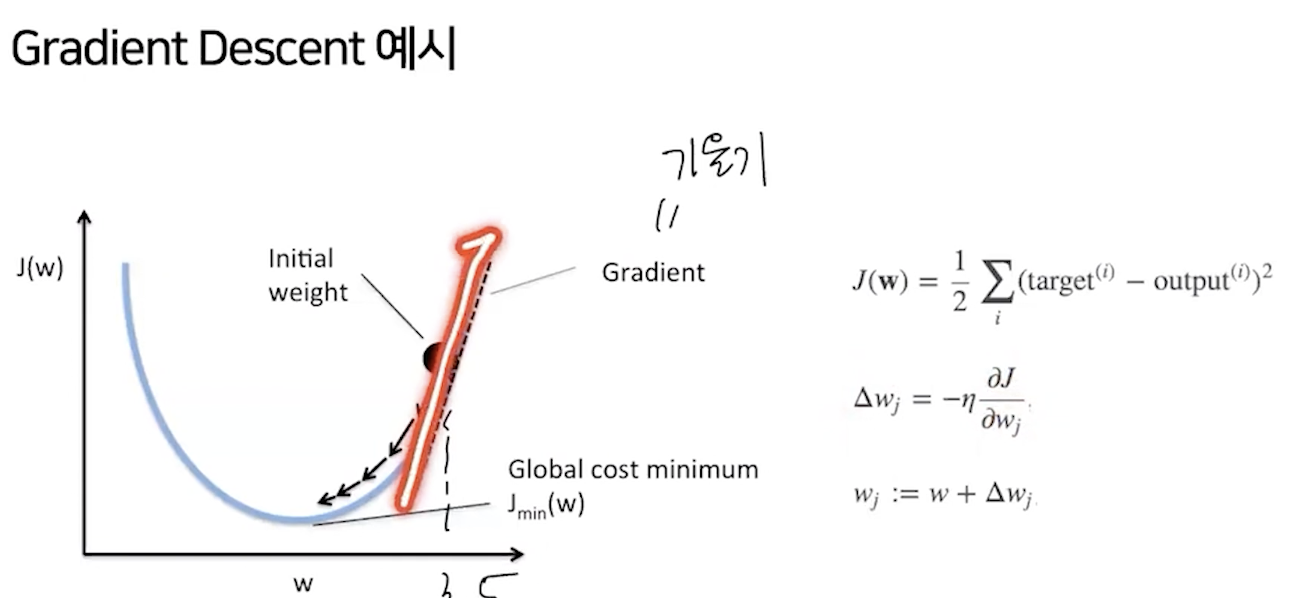

#### Gradient Descent 진행 식
* Error
  * $e_{ui}=r_{ui}-p_uq_i^T$
* Gradient
  * $\frac {\partial L}{\partial p_u} = \frac {\partial(r_{ui}-p_uq_i^T)^2}{\partial p_u} + \frac {\partial\lambda||p_u||^2_2}{\partial p_u} = -2(r_{ui}-p_uq_i^T)q_i+2\lambda p_u = -2(e_{ui}q_i-\lambda p_u)$
    * 기존 LOSS에서 $p_u$에 대해 편미분을 진행해 필요없는 $q_i$항을 모두 지우고 계산하면 $-2(e_{ui}q_i-\lambda p_u)$가 남게 됨.
  * Gradient 반대로 $p_u, q_i$ 업데이트
    * $p_u ← p_u +\eta \cdot(e_{ui}q_i - \lambda p_u)$
    * $q_i ← q_i +\eta \cdot(e_{ui}p_u - \lambda q_i)$

* 위와 같이 편미분이 가능하면 gradient 업데이트가 가능하다. 
  * convex한 함수여야 미분할 수 있음
  * $L_1$ 레귤러 텀의 경우 절대값인데, 절대값은 미분이 보통 어려운 편이어서 $L_2$로 많이 한다고들 한다.

### 편향의 추가 Adding Bias
유저, 아이템 별로 편향 파라미터를 추가해 학습하도록 한다. memory based CF에서 유저, 아이템 별로 Deviatio을 주었던 것과 비슷한 원리이다.
* 사용자 파라미터 $P_u$, 아이템 파라미터 $q_i$ 외에 사용자 편향 파라미터 $b_u$, 아이템 편향 파라미터 $b_i$를 추가해준다. 
  * 사용자의 경우 평점을 잘 주는 편인지, 낮게 주는 편인지의 편향을 추가할 수 있음 
  * 아이템의 경우도 평점을 낮게 받는 편인지 높게 받는 편인지를 고려해야 제대로 된 추천이 진행 될 수 있음
* $min_{P,Q}\displaystyle\sum_{r_{ui}}(r_{ui}-\mu - b_u -  b_i - p_uq_i^T)^2 +\lambda(||p_u||^2_2 +||q_i||^2_2 +b^2_u +b^2_i)$
  * $\mu$는 평균으로 평균 점수를 빼주고, 사용자 별, 아이템 별 편향을 제거해주는 방식




#### Gradient Descent 진행 식
* Error
  * $e_{ui}=r_{ui}-\mu - b_u - b_i -p_uq_i^T$
* Gradient : $b_i, b_u$를 추가적으로 업데이트 진행

    * $b_u ← b_u +\eta \cdot(e_{ui} - \lambda b_u)$
    * $b_i ← b_i +\eta \cdot(e_{ui} - \lambda b_i)$

    * $p_u ← p_u +\eta \cdot(e_{ui}q_i - \lambda p_u)$
    * $q_i ← q_i +\eta \cdot(e_{ui}p_u - \lambda q_i)$


#### Temporal Dynamics
시간에 따라 변화하는 유저, 아이템의 특성을 반영하고자 하는 방법.
* 아이템의 인기도, 유저의 평점 기준이 달라질 수 있음
* 최신성을 반영하는 방식
* 데이터가 많은 유저일수록 과거 데이터를 버리고 최신 것을 사용하는 등으로 계속해서 최신으로 업데이트하는 방식이 있음
  * 모델을 자주 학습시켜야, 최근에 나온 아이템 또는 최근 가입한 유저의 정보를 최대한 살려 Cold start 문제를 해결할 수 있음 
* 보통은 무빙 윈도우를 이용해 최근 30일 데이터 등으로 풀 트레이닝 진행

* 도메인에 따라 최신성의 중요도는 매우 달라질 수 있음
  * 영화의 경우 트렌드가 6개월에서 1년까지는 가도 무방
  * 이커머스의 경우 엄청나게 트렌드가 빠르게 바뀜. 계절성 역시도 한몫 함





#### Confidence Level
$r_{ui}$에 대한 신뢰도 term을 추가하는 방법.
  * 노출이 많이 된 인기도가 높은 아이템의 경우 더 선택을 받을 확률이 높은 반면, 그렇지 않은 경우는 노출이 안되어서 추천 대상이 되는 것 자체가 어려움.
  * Implicit Feedback을 처리할 때 주로 진행
  *  $min_{P,Q}\displaystyle\sum_{r_{ui}}c_{u,i}(r_{ui}-\mu - b_u -  b_i - p_uq_i^T)^2 +\lambda(||p_u||^2_2 +||q_i||^2_2 +b^2_u +b^2_i)$
    * 여기서의 $c_{u,i}$는 파라미터가 아니고, 특별히 잘 맞춰야 하는 유저 또는 아이템의 경우 틀릴 경우 오차를 더 주어서 더 정확히 맞추도록 하는 역할 


## Implicit Feedback을 위한 MF
Feat. Collaborative Filtering for Implicit Feedback Datasets, Yehuda Koren. et al.

### ALS (Alternative Least Square)
유저와 아이템 매트릭스를 번갈아가면서 업데이트 하는 방식. 두 매트릭스 중 하나를 상수로 둔 뒤 나머지 매트릭스를 업데이트 하는 방식

* 병렬처리가 가능
  * $p_u$나 $q_i$를 상수로 고정하면 loss function이 이차함수로 되어 convex 함수로 풀이가 가능.
  * $p_u$와 $q_i$를 따로따로 구해야 했던 SGD와 달리 한번에 상수로 놓고 계산이 가능
* Gradient를 구하기 위해 미분을 진행하지 않아도 행렬곱(matrix multiplication)만으로도 연산이 가능
  * 역행렬 연산이 가장 큰 컴퓨팅을 차지하지만, spark와 같은 분산처리 시스템에서는 이러한 연산을 빠르게 진행 가능
* 하기 수식을 통해 P,Q를 번갈아서 업데이트(Explicit Feedback일 경우)
  * $p_u = (Q^TQ +\lambda I)^{-1}Q^Tr_u$
  * $q_i = (P^TP +\lambda I)^{-1P}^Tr_i$
  * 병렬처리가 가능하다는 의미: SGD의 경우는 각 행렬 $P,Q$의 parameter를 하나하나 다 연산을 했어야 했다면, ALS는 행렬 전체 parameter를 한번에 행렬곱으로 구하기 때문에 병렬 처리가 됨 




#### Implicit Feedback의 처리
유저의 클릭, 조회 등으로 패턴을 파악해 추천을 해줘야하는데, 우연히 클릭한 것인지 알 수 없는 데이터

* Preference: 유저 u가 아이템 i를 선호하는지 여부를 binary로 표현
  * $r_{ui}$가 0보다 크면 1, 0일 경우 0으로 둠
* Confidence: 유저 u가 아이템 i를 얼마나 선호하는지를 나타내는 increasing function
  * $\alpha$는 positive feedback과 negative feedback 간의 상대적 중요도를 조정하는 하이퍼 파라미터
  * $c_{ui} = 1 + \alpha \cdot r_{ui}$

* $min_{P,Q}\displaystyle\sum_{r_{ui}}c_{u,i}(f_{ui} - p_uq_i^T)^2 + \lambda(||p_u||^2_2 + ||q_i||^2_2)$
  * 이 경우 $f_{ui}=1$로 가정할 때, $c_{ui}$에 따라 달라진다.
  * 유튜브 영상의 경우 오래봤으면 $c_{ui}$가 높고, 보자마자 화면을 넘겼으면 낮을 것이다.
  * 하여 $c_{ui}$가 높은 경우는 오차에 더 민감하도록 하여 더 잘 학습할 수 있도록 하는것
  * 이커머스의 경우, 클릭하고 머문 시간으로 볼 수 있다. 체류 시간이 없을 경우는 $c_{ui}$를 이용하지 않고 진행한다. 

* Confidence / Preference의 분리
  * 기존의 ALS term 중 맨 마지막에 평점데이터를 넣었던 것 대신, Confidence와 preference term을 넣어준다.
  * $p_u = (Q^TC^uQ + \lambda I)^{-1}Q^TC^uf_u$
  * $q_i = (P^TC^iP + \lambda I)^{-1}P^TC^if_i$



### BPR Optimization
사용을 잘 하진 않는 것이지만, 학습을 베이지안 기반으로 학습을 한 방법이다. Implicit 데이터를 활용할 수 있다.
